In [19]:
%matplotlib inline
from pylab import *
import numpy as np
import xmlrpc.client
import pickle

In [7]:
def to_string(arr):
    import json
    s=json.dumps(arr.tolist())
    return s

def from_string(s):
    import json
    from numpy import array
    arr=array(json.loads(s))
    return arr

In [8]:
server=xmlrpc.client.ServerProxy('http://10.2.2.30:8080')

In [34]:
server.move_forward(5)


In [5]:
server.move_backward(5)

In [22]:
a=server.take_picture()

In [35]:
%%time
arr=pickle.loads(server.take_picture().data)

CPU times: user 126 ms, sys: 80 ms, total: 206 ms
Wall time: 6.01 s


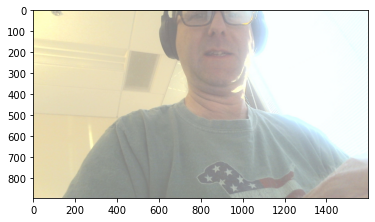

In [36]:
imshow(arr)

In [38]:
import paramiko
t = paramiko.Transport(('10.2.2.30', 22))
t.connect(username='pi', password='robots1234')
sftp = paramiko.SFTPClient.from_transport(t)

/home/pi/python/picture.jpg
CPU times: user 95.9 ms, sys: 36.4 ms, total: 132 ms
Wall time: 2.7 s


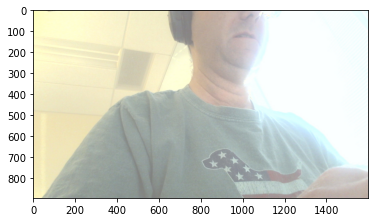

In [39]:
%%time
fname='picture.jpg'
name=server.take_picture2(fname)
print(name)
sftp.get(name,fname)
im=imread(fname)
imshow(im)

In [36]:
while True:
    print(server.position(),end="")

[1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 0][1, 

KeyboardInterrupt: 

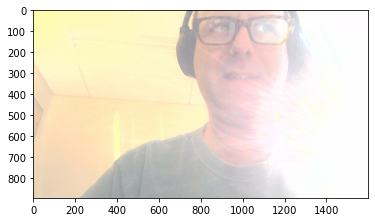

In [11]:
imshow(arr)

In [2]:
import xmlrpc.client

In [3]:
def to_string(arr):
    import json
    s=json.dumps(arr.tolist())
    return s

def from_string(s):
    import json
    from numpy import array
    arr=array(json.loads(s))
    return arr

In [4]:
def make_move(move):
    from Game import Board
    print("Making move ",move)
    
    board=Board(4,4)  # just to get the conversion functions for free
    
    start,end=move
    rs,cs=board.rc_from_index(start)  # convert to row, column
    re,ce=board.rc_from_index(end)
    
    distance_to_board=10
    length_column=4
    length_row=4

    type_of_move=ce-cs  # 0 for a forward move, +1 for a right-hand diagonal, -1 for left-hand diagonal
    distance_to_column=distance_to_board+length_column*cs
    distance_to_row=(4-rs)*length_row

    if type_of_move==0:  # forward

        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)
        arm_down()  # to push the piece
        move_forward( 1*length_row )
        arm_up()

        # go back
        move_backward(distance_to_row + 1*length_row)
        turn_robot_right_90()
        move_backward(distance_to_column)

    elif type_of_move==1:  # right-hand diagonal

        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)


        arm_down()  # to push the piece
        turn_robot_right_45()
        move_forward( 1*length_row )

        # go back
        move_backward(1*length_row)
        turn_robot_left_45()    
        move_backward(distance_to_row )
        turn_robot_right_90()
        move_backward(distance_to_column)

    elif type_of_move==-1:  # left-hand diagonal
        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)


        arm_down()  # to push the piece
        turn_robot_left_45()
        move_forward( 1*length_row )

        # go back
        move_backward(1*length_row)
        turn_robot_right_45()    
        move_backward(distance_to_row )
        turn_robot_right_90()
        move_backward(distance_to_column)

    else:
        raise ValueError("You can't get there from here.")



In [7]:
robot = xmlrpc.client.ServerProxy('http://dex.local:8080')

move_forward=robot.move_forward
move_backward=robot.move_backward
turn_robot_left_90=robot.turn_robot_left_90
turn_robot_right_90=robot.turn_robot_right_90
turn_robot_left_45=robot.turn_robot_left_45
turn_robot_right_45=robot.turn_robot_right_45
arm_up=robot.arm_up
arm_down=robot.arm_down


In [8]:
robot.move_forward(5)

ConnectionRefusedError: [Errno 61] Connection refused

In [54]:
robot.arm_up()

In [60]:
im=from_string(server.take_picture('current_board.jpg'))

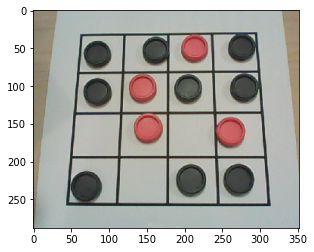

In [61]:
imshow(im)

In [64]:
make_move([12,8])

Making move  [12, 8]


In [65]:
robot.quit()

0